# Ejercico 2
## Reconocimeinto de patrones
- Acosta Imandt Daniel

In [1]:
from copy import deepcopy
import random
from math import dist
import math

import numpy as np
import matplotlib.pyplot as plt 

### Primero vamos a hacer un rapido reconocimiento de nuestros datos

In [2]:
X=[[0,0],[1,0],[1,1],[0,1],[4,1],[5,1],[5,2],[7,1],[7,2],[6,3],[2,3],[1,4],[2,5],[3,5]]
x=[[0,0],[1,0],[1,1],[0,1],[4,1],[5,1],[5,2],[7,1],[7,2],[6,3],[2,3],[1,4],[2,5],[3,5]]
Y=[[0,0],[4,1],[7,2],[2,3],[3,5]]

c=5
k=3
m0=2
s0=1.5
lam=0.5
d0=2.5
l=2
N=10
eps=1

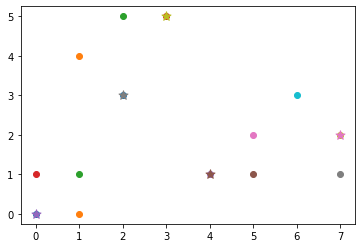

In [3]:
for i in range(len(x)):
    plt.scatter(x[i][0],x[i][1])

for j in range(len(Y)):
    plt.scatter(Y[j][0],Y[j][1],marker='*',s=90)

## Creamos funciones para cada paso del algoritmo

In [4]:
def p1(N):
    S=[2]*N
    L=[2]*N
    itera=0
    return S,L,itera
    

In [5]:

def p2(x,c,k,m0,s0,lam,d0,l,N,eps,Y,itera,S,L):
    cprima=c
    NC=1
    z=deepcopy(Y)
    longm=len(X)
    longc=len(Y)
    clas=[0]*longm
    for i in range(longm):
        dc=[0]*(longc)
        for j in range(longc):
            dc[j]=dist(X[i],Y[j])
        clas[i]=dc.index(min(dc))
    
    return cprima,clas, NC
    
    
    

In [6]:
def cuenta(clusin,vec):
    nclus=len(clusin)
    cuen=[0]*nclus
    for c in range(nclus):
        cuen[c]=[c,vec.count(c)]
    return cuen

def reagrupa(Y,cuen,m,d,muestra,l,c):
    cv=deepcopy(Y)
    dn=deepcopy(d)
    indices=[]
    veces=0
    for i in range(len(Y)):
        if(cuen[i][1]<m):
            if(veces<l):
                indices.append(i)
                cv.remove(Y[i])
            veces+=1
            c-=1
        else:
            pass
         
    for ind in range(len(indices)):
        for j in range(len(muestra)):
            if d[j]==indices[ind]:
                nc=dpc(muestra[j],cv)
                dn[j]=Y.index(nc)
            else:
                pass
    df=[0]*len(muestra)
    for k in range(len(muestra)):
        df[k]=cv.index(Y[dn[k]])
    
    return df      
                    
                    
    
def p3 (x,c,k,m0,s0,lam,d0,l,N,eps,Y,itera,S,L,cprima,clas,NC):
    cuen=cuenta(Y,clas)
    y=reagrupa(Y,cuen,m0,clas,x,l,c)
    return c,clas,cuen

In [7]:

def nuevclus(X,d):
    
    k=[0]*(max(d)+1)
    longc=len(k)
    longm=len(X)
    for i in range(longc):
        tot=0
        s1=0
        s2=0
        for j in range(longm):
            if d[j]==i:
                s1+=X[j][0]
                s2+=X[j][1]
                tot+=1
        k[i]=[s1/tot,s2/tot]

    return k

def p4(x,c,k,m0,s0,lam,d0,l,N,eps,Y,itera,S,L,cprima,clas,NC,cuen):
    Yprom=nuevclus(x,clas)
    suma=0
    for i in range(len(Yprom)):
        suma+=dist(Y[i],Yprom[i])

    if(c==cprima and suma<eps):
        NC=0
    return NC, Yprom
    

In [8]:


def p5(x,c,k,m0,s0,lam,d0,l,N,eps,Y,itera,S,L,cprima,clas,NC,cuen):
    longm=len(x)
    longc=len(Y)
    distp=[0]*longc
    for i in range(longc):
        tot=0
        suma=0
        for j in range(longm):
            if clas[j]==i:
                suma +=dist(x[j],Y[i])
                tot +=1
        distp[i]=suma/tot
    return distp

In [9]:


def p6(dprom,x,c,k,m0,s0,lam,d0,l,N,eps,Y,itera,S,L,cprima,clas,NC,cuen):
    dg=0
    for i in range(len(dprom)):
        dg+=(cuen[i][1]*dprom[i])
    distglob=dg/len(x)

    itera+=1
    return distglob,itera
    

In [10]:
def p7(x,c,k,m0,s0,lam,d0,l,N,eps,Y,itera,S,L,cprima,clas,NC,cuen,dprom,dglob):
    if(itera==N):
        x,c,k,m0,s0,lam,d0,l,N,eps,Y,itera,S,L,cprima,clas,NC,cuen,dprom,dglob= p13(x,c,k,m0,s0,lam,d0,l,N,eps,Y,itera,S,L,cprima,clas,NC,cuen,dprom,dglob)
        return x,c,k,m0,s0,lam,d0,l,N,eps,Y,itera,S,L,cprima,clas,NC,cuen,dprom,dglob
    
    elif (c<=((k+1)/2)):
        x,c,k,m0,s0,lam,d0,l,N,eps,Y,itera,S,L,cprima,clas,NC,cuen,dprom,dglob=p8(x,c,k,m0,s0,lam,d0,l,N,eps,Y,itera,S,L,cprima,clas,NC,cuen,dprom,dglob)
        return x,c,k,m0,s0,lam,d0,l,N,eps,Y,itera,S,L,cprima,clas,NC,cuen,dprom,dglob
    
    elif((((k+1)/2)<c) and (c<2*k) and (c%2!=0)):
        x,c,k,m0,s0,lam,d0,l,N,eps,Y,itera,S,L,cprima,clas,NC,cuen,dprom,dglob=p8(x,c,k,m0,s0,lam,d0,l,N,eps,Y,itera,S,L,cprima,clas,NC,cuen,dprom,dglob)
        return x,c,k,m0,s0,lam,d0,l,N,eps,Y,itera,S,L,cprima,clas,NC,cuen,dprom,dglob
    
    elif(c>=2*k):
        x,c,k,m0,s0,lam,d0,l,N,eps,Y,itera,S,L,cprima,clas,NC,cuen,dprom,dglob,lump,las=p10(x,c,k,m0,s0,lam,d0,l,N,eps,Y,itera,S,L,cprima,clas,NC,cuen,dprom,dglob)
        return x,c,k,m0,s0,lam,d0,l,N,eps,Y,itera,S,L,cprima,clas,NC,cuen,dprom,dglob
    
    elif((((k+1)/2)<c) and (c<2*k) and (c%2==0)):
        x,c,k,m0,s0,lam,d0,l,N,eps,Y,itera,S,L,cprima,clas,NC,cuen,dprom,dglob,lump,las=p10(x,c,k,m0,s0,lam,d0,l,N,eps,Y,itera,S,L,cprima,clas,NC,cuen,dprom,dglob)
        return x,c,k,m0,s0,lam,d0,l,N,eps,Y,itera,S,L,cprima,clas,NC,cuen,dprom,dglob


    return x,c,k,m0,s0,lam,d0,l,N,eps,Y,itera,S,L,cprima,clas,NC,cuen,dprom,dglob

In [11]:
def repite(x,c,k,m0,s0,lam,d0,l,N,eps,Y,itera,S,L):
    cprima,clas,NC=p2(x,c,k,m0,s0,lam,d0,l,N,eps,Y,itera,S,L)
    c,clas,cuen=p3(x,c,k,m0,s0,lam,d0,l,N,eps,Y,itera,S,L,cprima,clas,NC)
    NC, Y=p4(x,c,k,m0,s0,lam,d0,l,N,eps,Y,itera,S,L,cprima,clas,NC,cuen)
    dprom=p5(x,c,k,m0,s0,lam,d0,l,N,eps,Y,itera,S,L,cprima,clas,NC,cuen)
    dglob,itera=p6(dprom,x,c,k,m0,s0,lam,d0,l,N,eps,Y,itera,S,L,cprima,clas,NC,cuen)
    
    x,c,k,m0,s0,lam,d0,l,N,eps,Y,itera,S,L,cprima,clas,NC,cuen,dprom,dglob=p7(x,c,k,m0,s0,lam,d0,l,N,eps,Y,itera,S,L,cprima,clas,NC,cuen,dprom,dglob)
    
    return x,c,k,m0,s0,lam,d0,l,N,eps,Y,itera,S,L,cprima,clas,NC,cuen,dprom,dglob

In [12]:

def p8(x,c,k,m0,s0,lam,d0,l,N,eps,Y,itera,S,L,cprima,clas,NC,cuen,dprom,dglob):
    S[itera]=0
    dv=[0]*len(Y)
    longm=len(x)
    longc=len(Y)
    for i in range(longc):
        s1=0
        s2=0
        tot=0
        for j in range(longm):
            if clas[j]==i:
                s1+=((X[j][0]-Y[i][0])**2)
                s2+=((X[j][1]-Y[i][1])**2)
                tot+=1
        dv[i]=[(math.sqrt(s1/tot)),(math.sqrt(s2/tot))]



    sm=[0]* len(dv)
    for i in range(len(dv)):
        sm[i]=max(dv[i])
    x,c,k,m0,s0,lam,d0,l,N,eps,ymasnuevo,itera,S,L,cprima,clas,NC,cuen,dprom,dglob=p9(x,c,k,m0,s0,lam,d0,l,N,eps,Y,itera,S,L,cprima,clas,NC,cuen,dprom,dglob,dv,sm)
    
    
    return x,c,k,m0,s0,lam,d0,l,N,eps,ymasnuevo,itera,S,L,cprima,clas,NC,cuen,dprom,dglob

In [13]:

def p9(x,c,k,m0,s0,lam,d0,l,N,eps,Y,itera,S,L,cprima,clas,NC,cuen,dprom,dglob,desv,maxsig):
    mj=[0]*len(cuen)
    cop=deepcopy(Y)
    for v in range(len(cuen)):
        mj[v]=cuen[v][1]
    
            
    for i in range(len(maxsig)):
        if(maxsig[i]>s0):
            if ((c<=((k+1)/2)) or ((dprom[i]>dglob) and (mj[i]>=2*m0))):
                cop.append([0,0])
                cop[i][0]=(Y[i][0]+(l*maxsig[i]))
                cop[i][1]=(Y[i][1]+(l*maxsig[i]))
                cop[-1][0]=Y[i][0]-(l*maxsig[i])
                cop[-1][1]=Y[i][1]-(l*maxsig[i])
                c=c+1
            else:
                #print("No se cumplió ninguna cond")
                pass
        else:
            #print("No aplica")
            pass

    if(len(cop)!=len(Y)):
        S[itera]=1
        x,c,k,m0,s0,lam,d0,l,N,eps,cop,itera,S,L,cprima,clas,NC,cuen,dprom,dglob=repite(x,c,k,m0,s0,lam,d0,l,N,eps,cop,itera,S,L)
        return x,c,k,m0,s0,lam,d0,l,N,eps,cop,itera,S,L,cprima,clas,NC,cuen,dprom,dglob

    
    
    else:
        if(itera>1 and L[itera-1]==0 and NC==0):
            x,c,k,m0,s0,lam,d0,l,N,eps,cop,itera,S,L,cprima,clas,NC,cuen,dprom,dglob=p12(x,c,k,m0,s0,lam,d0,l,N,eps,Y,itera,S,L,cprima,clas,NC,cuen,dprom,dglob)
            return x,c,k,m0,s0,lam,d0,l,N,eps,cop,itera,S,L,cprima,clas,NC,cuen,dprom,dglob
        
        elif (itera>1 and L[itera-1]==0 and NC==1):
            x,c,k,m0,s0,lam,d0,l,N,eps,cop,itera,S,L,cprima,clas,NC,cuen,dprom,dglob=repite(x,c,k,m0,s0,lam,d0,l,N,eps,cop,itera,S,L)
            return x,c,k,m0,s0,lam,d0,l,N,eps,cop,itera,S,L,cprima,clas,NC,cuen,dprom,dglob
        
        elif (itera>1 and L[itera-1]!=0):
            x,c,k,m0,s0,lam,d0,l,N,eps,cop,itera,S,L,cprima,clas,NC,cuen,dprom,dglob=p10(x,c,k,m0,s0,lam,d0,l,N,eps,cop,itera,S,L,cprima,clas,NC,cuen,dprom,dglob)
            return x,c,k,m0,s0,lam,d0,l,N,eps,cop,itera,S,L,cprima,clas,NC,cuen,dprom,dglob
        else:
            x,c,k,m0,s0,lam,d0,l,N,eps,cop,itera,S,L,cprima,clas,NC,cuen,dprom,dglob=p10(x,c,k,m0,s0,lam,d0,l,N,eps,cop,itera,S,L,cprima,clas,NC,cuen,dprom,dglob)
            return x,c,k,m0,s0,lam,d0,l,N,eps,cop,itera,S,L,cprima,clas,NC,cuen,dprom,dglob

In [14]:

def lumping(yvec,d0,l):
    lyvec=len(yvec)
    m=np.zeros((lyvec, lyvec))
    p=[]
    valores=[]
    lprima=0
    lump=[]
    for i in range(lyvec):
        for j in range(lyvec):
            if i<j:
                m[i][j]=dist(yvec[i],yvec[j])
            else:
                m[i][j]=0
            if (m[i][j]<d0 and m[i][j]!=0):
                if(i!=j):
                    p.append([[i,j],m[i][j]])
                    valores.append(m[i][j])
                    lprima+=1
                else:
                    pass
            else:
                pass
    las=min(lprima,l)
    valores.sort()
    if(las%2==0):
        valores=valores[0:las]
    else:
        valores=valores[0:las-1]
        print('ocupamos un num par para agrupar')
    
    for s in valores:
        for t in range(len(p)):
            if(s==p[t][1]):
                lump.append(p[t][0])
            else:
                pass
            
    
    return lump,las
def p10(x,c,k,m0,s0,lam,d0,l,N,eps,Y,itera,S,L,cprima,clas,NC,cuen,dprom,dglob):
    L[itera]=0
    lump=[]
    las=0
    if(c<2 and S[itera]==0 and NC==0):
        x,c,k,m0,s0,lam,d0,l,N,eps,Y,itera,S,L,cprima,clas,NC,cuen,dprom,dglob=p12(x,c,k,m0,s0,lam,d0,l,N,eps,Y,itera,S,L,cprima,clas,NC,cuen,dprom,dglob)
        return x,c,k,m0,s0,lam,d0,l,N,eps,Y,itera,S,L,cprima,clas,NC,cuen,dprom,dglob
    
    elif (c<2 and S[itera]==0 and NC==1):
        x,c,k,m0,s0,lam,d0,l,N,eps,Y,itera,S,L,cprima,clas,NC,cuen,dprom,dglob=repite(x,c,k,m0,s0,lam,d0,l,N,eps,Y,itera,S,L)
        return x,c,k,m0,s0,lam,d0,l,N,eps,Y,itera,S,L,cprima,clas,NC,cuen,dprom,dglob

    elif(c<2 and S[itera]==2):
        x,c,k,m0,s0,lam,d0,l,N,eps,Y,itera,S,L,cprima,clas,NC,cuen,dprom,dglob=repite(x,c,k,m0,s0,lam,d0,l,N,eps,Y,itera,S,L)
        return x,c,k,m0,s0,lam,d0,l,N,eps,Y,itera,S,L,cprima,clas,NC,cuen,dprom,dglob

    else:
        lump,las=lumping(Y,d0,l)
        if las==0:
            if(S[itera]==2):
                x,c,k,m0,s0,lam,d0,l,N,eps,Y,itera,S,L,cprima,clas,NC,cuen,dprom,dglob=repite(x,c,k,m0,s0,lam,d0,l,N,eps,Y,itera,S,L)
                return x,c,k,m0,s0,lam,d0,l,N,eps,Y,itera,S,L,cprima,clas,NC,cuen,dprom,dglob
                
            elif(S[itera]==0):
                x,c,k,m0,s0,lam,d0,l,N,eps,Y,itera,S,L,cprima,clas,NC,cuen,dprom,dglob=p12(x,c,k,m0,s0,lam,d0,l,N,eps,Y,itera,S,L,cprima,clas,NC,cuen,dprom,dglob)
                return x,c,k,m0,s0,lam,d0,l,N,eps,Y,itera,S,L,cprima,clas,NC,cuen,dprom,dglob
        else:
            L[itera]=1
            x,c,k,m0,s0,lam,d0,l,N,eps,Y,itera,S,L,cprima,clas,NC,cuen,dprom,dglob=p11(x,c,k,m0,s0,lam,d0,l,N,eps,Y,itera,S,L,cprima,clas,NC,cuen,dprom,dglob,lump,las)
            return x,c,k,m0,s0,lam,d0,l,N,eps,Y,itera,S,L,cprima,clas,NC,cuen,dprom,dglob
            
    return x,c,k,m0,s0,lam,d0,l,N,eps,Y,itera,S,L,cprima,clas,NC,cuen,dprom,dglob
        
    

In [15]:


def lumpclus(lum,yvec,cuen,las,c):
    a=[]
    nuevo=deepcopy(yvec)
    for i in range(len(lum)):
        nuevo.append([((cuen[lum[i][0]][1]*yvec[lum[i][0]][0]+
                        cuen[lum[i][1]][1]*yvec[lum[i][1]][0])/(cuen[lum[i][0]][1]+cuen[lum[i][1]][1])),
                      ((cuen[lum[i][0]][1]*yvec[lum[i][0]][1]+
                        cuen[lum[i][1]][1]*yvec[lum[i][1]][1])/(cuen[lum[i][0]][1]+cuen[lum[i][1]][1]))])
        
    for j in range(len(lum)):
        for k in range(len(lum[0])):
            nuevo.remove(yvec[lum[j][k]])
    c=c-las
    return nuevo,c
def p11(x,c,k,m0,s0,lam,d0,l,N,eps,Y,itera,S,L,cprima,clas,NC,cuen,dprom,dglob,lump,las):
    Y,c=lumpclus(lump,Y,cuen,las,c)

    x,c,k,m0,s0,lam,d0,l,N,eps,Y,itera,S,L,cprima,clas,NC,cuen,dprom,dglob=repite(x,c,k,m0,s0,lam,d0,l,N,eps,Y,itera,S,L)
    return x,c,k,m0,s0,lam,d0,l,N,eps,Y,itera,S,L,cprima,clas,NC,cuen,dprom,dglob

In [16]:
def p12(x,c,k,m0,s0,lam,d0,l,N,eps,Y,itera,S,L,cprima,clas,NC,cuen,dprom,dglob):
    itera=N
    return x,c,k,m0,s0,lam,d0,l,N,eps,Y,itera,S,L,cprima,clas,NC,cuen,dprom,dglob

In [17]:
def p13(x,c,k,m0,s0,lam,d0,l,N,eps,clusin,itera,S,L,cprima,clas,NC,cuen,dprom,dglob):
    print("Número de iteraciones excede")
    itera=N
    return x,c,k,m0,s0,lam,d0,l,N,eps,clusin,itera,S,L,cprima,clas,NC,cuen,dprom,dglob

In [18]:
def isodata(x,c,k,m0,s0,lam,d0,l,N,eps,Y=[]):
    S,L,itera=p1(N)
    
    while itera<N:
        x,c,k,m0,s0,lam,d0,l,N,eps,Y,itera,S,L,cprima,clas,NC,cuen,dprom,dglob=repite(x,c,k,m0,s0,lam,d0,l,N,eps,Y,itera,S,L)
        itera+=1
        
    return Y,clas

## Vemos los resultados

Los clusters son:  [[0.5, 0.5], [2.0, 4.25], [5.666666666666667, 1.6666666666666667]]
Las clase son:  [0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1]


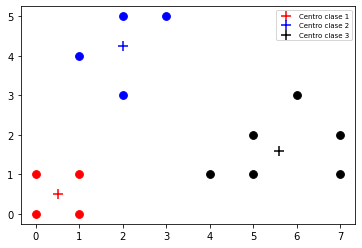

In [19]:

m11=[0,1,1,0]
m12=[0,0,1,1]

m21=[2,1,2,3] 
m22=[3,4,5,5]

m31=[4,5,5,7,7,6]
m32=[1,1,2,1,2,3]

c11=[0.5]
c12=[0.5]

c21=[2.0]
c22=[4.25]

c31=[5.6]
c32=[1.6]


c1=plt.scatter(c11,c12, marker='+',color='red',s=90)
m1=plt.scatter(m11,m12, marker='o',color='red',s=60)

c2=plt.scatter(c21,c22, marker='+',color='blue',s=90)
m2=plt.scatter(m21,m22, marker='o',color='blue',s=60)

c3=plt.scatter(c31,c32, marker='+',color='black',s=90)
m3=plt.scatter(m31,m32, marker='o',color='black',s=60)
plt.legend((c1, c2,c3),
           ('Centro clase 1', 'Centro clase 2', 'Centro clase 3'),
           loc='upper right',
           ncol=1,
           fontsize=7)

clus,clas=isodata(x,c,k,m0,s0,lam,d0,l,N,eps,Y)
print("Los clusters son: ", clus)
print("Las clase son: ", clas)


# Preguntas de rutina

## Preguntas


###  ¿Es correcto?

Notamos que en elfecto el alogrimto mcumple con lo que se pide pór lo que podemos concluir que en efecto es correcto, ya que al terminar nos regresa nuevos centros 

###  ¿Complejidad en tiempo?
Notmaos que este algoritmo se puede interar bastantes veces, por lo que hay que tomar eso en cuenta donde $i$ es la cantidad de iteraciones,por otro lado tenemos distitnas muestras que se nos dan y a cada una de estas se tiene que hacer todo el proceso por lo que $m$ es la cantidad de muestras, por ultimo tambien tenemos que tomar la cnatidad de clusters, y como en este algoritmo el maximo de clusters es $k=2c$ donde c es los clusters dados por el usuario.
Por lo tanto la complejidad en tiempo queda como $$O(inc)$$


### ¿Complejidad en espacio?

Debido a que las variables que no son los clusters($C$) ni las muestras($M$), son constantes las olvidamos, por lo quen solo nos quedan la cantidad de muestras y de clusters, como el número de muestras es mayor que el clusters y suele ser por mucho , solo nos fijamos en las muestras, tomando en cuenta su dimensión $d$, obtenemos:
$$O(dM)$$

### Vetnajas y desentajas

Al comparar con K-means se suelen obtener mejores resultados, ya que este esta dispuesto a cambiar el número de clusters totales, lo que lo hace más versatil,por lo que esto es una gran ventaja.
Por otro lado desde el principio se nos piden un byuen de varaibles que puede que no conozcamos o con las que tengamos que jugar y para alguien que no sepa bien que se refiere cada variable o conozca el conjunto de datos puede ayuentarlo y ademas es mucho más dificil de programar que otros algoritmos de claisficación




## Opinión
Cómo vimos en clase isodata suele ser más eficaz que K-means para encontrar el centro de difertnes clusters, pero solo al ver la cantidad de parámetros que se requieren ya nos podemos dar una idea de por que no es tan utilizado.
Por otro lado la implementación de este algoritmo es mucho más complicada que K-means, por lo que en efecto prefiero  ese a isodata.